In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
'''
FEATURES:
Overall action count/ratio      DONE
Overall day count               DONE
Monthly action count/ratio      DONE
Product Diversity               DONE
Monthly aggregation         TODO
Merchant aggregation        TODO
Double 11 features              DONE
latest one-week                 DONE
% Repeat buyer                  DONE ---- ADDED TO USER PROFILE
LDA features                    DONE
PCA features                    DONE ---- ADDED TO USER PROFILE
'''

'\nFEATURES:\nOverall action count/ratio      DONE\nOverall day count               DONE\nMonthly action count/ratio      DONE\nProduct Diversity               DONE\nMonthly aggregation         TODO\nMerchant aggregation        TODO\nDouble 11 features              DONE\nlatest one-week                 DONE\n% Repeat buyer                  DONE ---- ADDED TO USER PROFILE\nLDA features                    DONE\nPCA features                    DONE ---- ADDED TO USER PROFILE\n'

In [2]:
df = pd.read_csv("./use_data/expanded_testing.csv")
df

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,prob
0,149002,282,885,3791,1500.0,1111,0,5.0,2.0,NaN
1,149002,282,885,3791,1500.0,1107,0,5.0,2.0,NaN
2,109881,230,629,1,1662.0,820,0,4.0,0.0,NaN
3,109881,230,629,1,1662.0,820,0,4.0,0.0,NaN
4,109881,230,629,1,1662.0,820,0,4.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6544,73105,259,614,637,2603.0,1111,0,2.0,0.0,NaN
6545,403421,175,1181,4760,247.0,1111,0,3.0,1.0,NaN
6546,116738,186,267,1200,2276.0,1110,0,2.0,1.0,NaN
6547,116738,186,267,1200,2276.0,1101,0,2.0,1.0,NaN


In [3]:
df_user = df[['user_id']]
df_user

,user_id
0,149002
1,149002
2,109881
3,109881
4,109881
...,...
6544,73105
6545,403421
6546,116738
6547,116738


In [4]:
#FEATURE 1: OVERALL ACTION COUNT/RATIO
actions = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['user_id'] not in actions:
        # there may be multiple entries, so default with an empty list
        actions[row["user_id"]] = [] 
    actions[row["user_id"]].append(row["action_type"])

# DANIEL: taking out unique value lists    
#for k,v in actions.items():
#    actions[k] = list(set(v)) # make each value list unique
actions

{149002.0: [0.0, 0.0],
 109881.0: [0.0, 0.0, 0.0],
 142526.0: [0.0],
 123526.0: [0.0, 0.0, 0.0, 2.0],
 359170.0: [3.0],
 46520.0: [0.0],
 346053.0: [0.0],
 355049.0: [2.0, 0.0, 0.0],
 47958.0: [0.0],
 50931.0: [2.0],
 125098.0: [0.0],
 365160.0: [0.0, 0.0],
 339574.0: [0.0],
 14747.0: [0.0, 0.0, 0.0, 0.0],
 382864.0: [0.0],
 375786.0: [0.0],
 266494.0: [0.0],
 267067.0: [0.0],
 143871.0: [0.0],
 379824.0: [0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 59889.0: [2.0, 0.0],
 188455.0: [0.0],
 248722.0: [0.0],
 97560.0: [0.0, 0.0],
 104634.0: [0.0, 0.0],
 7692.0: [2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 331906.0: [0.0],
 305119.0: [0.0],
 227909.0: [0.0],
 345174.0: [0.0],
 114906.0: [0.0],
 104420.0: [0.0, 2.0],
 47143.0: [0.0],
 243241.0: [3.0, 0.0, 0.0, 0.0, 0.0, 3.0],
 48664.0: [2.0, 0.0],
 389693.0: [0.0],
 266355.0: [3.0],
 237879.0: [0.0],
 149697.0: [0.0],
 44152.0: [0.0, 0.0],
 141307.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 337965.0: [0.0],
 329315.0: [0.0],
 43299.

In [5]:
#for k,v in actions.items():
#    actions[k] = list(set(v)) # make each value list unique

In [6]:
actions

{149002.0: [0.0, 0.0],
 109881.0: [0.0, 0.0, 0.0],
 142526.0: [0.0],
 123526.0: [0.0, 0.0, 0.0, 2.0],
 359170.0: [3.0],
 46520.0: [0.0],
 346053.0: [0.0],
 355049.0: [2.0, 0.0, 0.0],
 47958.0: [0.0],
 50931.0: [2.0],
 125098.0: [0.0],
 365160.0: [0.0, 0.0],
 339574.0: [0.0],
 14747.0: [0.0, 0.0, 0.0, 0.0],
 382864.0: [0.0],
 375786.0: [0.0],
 266494.0: [0.0],
 267067.0: [0.0],
 143871.0: [0.0],
 379824.0: [0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 59889.0: [2.0, 0.0],
 188455.0: [0.0],
 248722.0: [0.0],
 97560.0: [0.0, 0.0],
 104634.0: [0.0, 0.0],
 7692.0: [2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 331906.0: [0.0],
 305119.0: [0.0],
 227909.0: [0.0],
 345174.0: [0.0],
 114906.0: [0.0],
 104420.0: [0.0, 2.0],
 47143.0: [0.0],
 243241.0: [3.0, 0.0, 0.0, 0.0, 0.0, 3.0],
 48664.0: [2.0, 0.0],
 389693.0: [0.0],
 266355.0: [3.0],
 237879.0: [0.0],
 149697.0: [0.0],
 44152.0: [0.0, 0.0],
 141307.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 337965.0: [0.0],
 329315.0: [0.0],
 43299.

In [7]:
action_count = {}
for key in actions.keys():
    action_count[key] = len(actions[key])
action_count

{149002.0: 2,
 109881.0: 3,
 142526.0: 1,
 123526.0: 4,
 359170.0: 1,
 46520.0: 1,
 346053.0: 1,
 355049.0: 3,
 47958.0: 1,
 50931.0: 1,
 125098.0: 1,
 365160.0: 2,
 339574.0: 1,
 14747.0: 4,
 382864.0: 1,
 375786.0: 1,
 266494.0: 1,
 267067.0: 1,
 143871.0: 1,
 379824.0: 6,
 59889.0: 2,
 188455.0: 1,
 248722.0: 1,
 97560.0: 2,
 104634.0: 2,
 7692.0: 11,
 331906.0: 1,
 305119.0: 1,
 227909.0: 1,
 345174.0: 1,
 114906.0: 1,
 104420.0: 2,
 47143.0: 1,
 243241.0: 6,
 48664.0: 2,
 389693.0: 1,
 266355.0: 1,
 237879.0: 1,
 149697.0: 1,
 44152.0: 2,
 141307.0: 9,
 337965.0: 1,
 329315.0: 1,
 43299.0: 1,
 167621.0: 1,
 323238.0: 1,
 203088.0: 7,
 104074.0: 3,
 13603.0: 1,
 79000.0: 2,
 182925.0: 1,
 100396.0: 1,
 362703.0: 1,
 252255.0: 1,
 324321.0: 2,
 358906.0: 1,
 266517.0: 1,
 96868.0: 1,
 154294.0: 1,
 376516.0: 1,
 366794.0: 1,
 328683.0: 1,
 342518.0: 1,
 323502.0: 2,
 376717.0: 1,
 230720.0: 3,
 423557.0: 1,
 312926.0: 1,
 240570.0: 2,
 124397.0: 1,
 34368.0: 1,
 92380.0: 8,
 343577.

In [8]:
total_action_count = sum(action_count.values())
total_action_count

6549

In [9]:
action_count_ratio = {}
for key in action_count:
    action_count_ratio[key] = action_count[key]/total_action_count
action_count_ratio

{149002.0: 0.00030539013589861045,
 109881.0: 0.0004580852038479157,
 142526.0: 0.00015269506794930523,
 123526.0: 0.0006107802717972209,
 359170.0: 0.00015269506794930523,
 46520.0: 0.00015269506794930523,
 346053.0: 0.00015269506794930523,
 355049.0: 0.0004580852038479157,
 47958.0: 0.00015269506794930523,
 50931.0: 0.00015269506794930523,
 125098.0: 0.00015269506794930523,
 365160.0: 0.00030539013589861045,
 339574.0: 0.00015269506794930523,
 14747.0: 0.0006107802717972209,
 382864.0: 0.00015269506794930523,
 375786.0: 0.00015269506794930523,
 266494.0: 0.00015269506794930523,
 267067.0: 0.00015269506794930523,
 143871.0: 0.00015269506794930523,
 379824.0: 0.0009161704076958314,
 59889.0: 0.00030539013589861045,
 188455.0: 0.00015269506794930523,
 248722.0: 0.00015269506794930523,
 97560.0: 0.00030539013589861045,
 104634.0: 0.00030539013589861045,
 7692.0: 0.0016796457474423576,
 331906.0: 0.00015269506794930523,
 305119.0: 0.00015269506794930523,
 227909.0: 0.00015269506794930523,

In [10]:
df_user['action count'] = -1
df_user['action count ratio'] = -1
for index,row in df_user.iterrows():
        df_user.at[index, 'action count'] = action_count[row['user_id']]
        df_user.at[index, 'action count ratio'] = action_count_ratio[row['user_id']]

df_user

/tmp/ipykernel_14158/873788209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['action count'] = -1
/tmp/ipykernel_14158/873788209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['action count ratio'] = -1


,user_id,action count,action count ratio
0,149002,2,0.000305
1,149002,2,0.000305
2,109881,3,0.000458
3,109881,3,0.000458
4,109881,3,0.000458
...,...,...,...
6544,73105,1,0.000153
6545,403421,1,0.000153
6546,116738,2,0.000305
6547,116738,2,0.000305


In [11]:
#FEATURE 2: OVERALL DAY COUNT
days = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['user_id'] not in days:
        # there may be multiple entries, so default with an empty list
        days[row["user_id"]] = [] 
    days[row["user_id"]].append(row["time_stamp"])

In [12]:
for k,v in days.items():
    days[k] = list(set(v)) # make each value list unique

In [13]:
days

{149002.0: [1107.0, 1111.0],
 109881.0: [820.0],
 142526.0: [1111.0],
 123526.0: [618.0, 620.0],
 359170.0: [1021.0],
 46520.0: [1111.0],
 346053.0: [930.0],
 355049.0: [1017.0],
 47958.0: [522.0],
 50931.0: [610.0],
 125098.0: [710.0],
 365160.0: [705.0, 722.0],
 339574.0: [1004.0],
 14747.0: [609.0, 1110.0, 1111.0],
 382864.0: [820.0],
 375786.0: [1029.0],
 266494.0: [1030.0],
 267067.0: [1105.0],
 143871.0: [730.0],
 379824.0: [1110.0, 1111.0],
 59889.0: [1013.0],
 188455.0: [1103.0],
 248722.0: [617.0],
 97560.0: [814.0, 815.0],
 104634.0: [1111.0],
 7692.0: [1108.0, 1109.0, 1110.0, 1111.0],
 331906.0: [1109.0],
 305119.0: [1111.0],
 227909.0: [629.0],
 345174.0: [1111.0],
 114906.0: [803.0],
 104420.0: [916.0],
 47143.0: [815.0],
 243241.0: [929.0, 1101.0, 624.0, 1110.0, 1111.0],
 48664.0: [820.0],
 389693.0: [617.0],
 266355.0: [1013.0],
 237879.0: [1006.0],
 149697.0: [625.0],
 44152.0: [711.0],
 141307.0: [1107.0, 1111.0],
 337965.0: [618.0],
 329315.0: [617.0],
 43299.0: [1110

In [14]:
day_count = {}
for key in days.keys():
    day_count[key] = len(days[key])
day_count

{149002.0: 2,
 109881.0: 1,
 142526.0: 1,
 123526.0: 2,
 359170.0: 1,
 46520.0: 1,
 346053.0: 1,
 355049.0: 1,
 47958.0: 1,
 50931.0: 1,
 125098.0: 1,
 365160.0: 2,
 339574.0: 1,
 14747.0: 3,
 382864.0: 1,
 375786.0: 1,
 266494.0: 1,
 267067.0: 1,
 143871.0: 1,
 379824.0: 2,
 59889.0: 1,
 188455.0: 1,
 248722.0: 1,
 97560.0: 2,
 104634.0: 1,
 7692.0: 4,
 331906.0: 1,
 305119.0: 1,
 227909.0: 1,
 345174.0: 1,
 114906.0: 1,
 104420.0: 1,
 47143.0: 1,
 243241.0: 5,
 48664.0: 1,
 389693.0: 1,
 266355.0: 1,
 237879.0: 1,
 149697.0: 1,
 44152.0: 1,
 141307.0: 2,
 337965.0: 1,
 329315.0: 1,
 43299.0: 1,
 167621.0: 1,
 323238.0: 1,
 203088.0: 3,
 104074.0: 1,
 13603.0: 1,
 79000.0: 1,
 182925.0: 1,
 100396.0: 1,
 362703.0: 1,
 252255.0: 1,
 324321.0: 1,
 358906.0: 1,
 266517.0: 1,
 96868.0: 1,
 154294.0: 1,
 376516.0: 1,
 366794.0: 1,
 328683.0: 1,
 342518.0: 1,
 323502.0: 2,
 376717.0: 1,
 230720.0: 1,
 423557.0: 1,
 312926.0: 1,
 240570.0: 1,
 124397.0: 1,
 34368.0: 1,
 92380.0: 3,
 343577.0

In [15]:
df_user['day count'] = -1
for index,row in df_user.iterrows():
        df_user.at[index, 'day count'] = day_count[row['user_id']]

df_user

/tmp/ipykernel_14158/2569712461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['day count'] = -1


,user_id,action count,action count ratio,day count
0,149002,2,0.000305,2
1,149002,2,0.000305,2
2,109881,3,0.000458,1
3,109881,3,0.000458,1
4,109881,3,0.000458,1
...,...,...,...,...
6544,73105,1,0.000153,1
6545,403421,1,0.000153,1
6546,116738,2,0.000305,2
6547,116738,2,0.000305,2


In [17]:
#FEATURE 4: Product Diversity
items = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['item_id'] not in items:
        # there may be multiple entries, so default with an empty list
        items[row["user_id"]] = [] 
    items[row["user_id"]].append(row["item_id"])

KeyError: 411541.0

In [ ]:
for k,v in items.items():
    items[k] = list(set(v)) # make each value list unique

In [ ]:
items

{379824.0: [198.0],
 141307.0: [175.0],
 252255.0: [175.0],
 309566.0: [175.0],
 206032.0: [281.0],
 182119.0: [279.0],
 68225.0: [279.0],
 109919.0: [198.0],
 342023.0: [190.0],
 287829.0: [175.0],
 255960.0: [279.0],
 380420.0: [190.0],
 176150.0: [175.0],
 407671.0: [219.0],
 388332.0: [285.0],
 244552.0: [278.0],
 46507.0: [224.0],
 191162.0: [184.0],
 174308.0: [175.0],
 134532.0: [279.0],
 355159.0: [279.0],
 62942.0: [312.0],
 353962.0: [184.0],
 319670.0: [175.0],
 210578.0: [279.0],
 101110.0: [281.0],
 149798.0: [224.0],
 6018.0: [184.0],
 281262.0: [279.0],
 314519.0: [219.0],
 205257.0: [279.0],
 117839.0: [279.0],
 46699.0: [175.0],
 238412.0: [253.0],
 156961.0: [279.0],
 45576.0: [279.0],
 214766.0: [253.0],
 5524.0: [224.0],
 218669.0: [279.0],
 272518.0: [224.0],
 277770.0: [279.0],
 386295.0: [279.0],
 402251.0: [175.0],
 254609.0: [279.0],
 84043.0: [175.0],
 120820.0: [175.0],
 291453.0: [274.0],
 280293.0: [184.0],
 291386.0: [279.0],
 313634.0: [226.0],
 60260.0: 

In [ ]:
item_count = {}
for key in items.keys():
    item_count[key] = len(items[key])
item_count

{379824.0: 1,
 141307.0: 1,
 252255.0: 1,
 309566.0: 1,
 206032.0: 1,
 182119.0: 1,
 68225.0: 1,
 109919.0: 1,
 342023.0: 1,
 287829.0: 1,
 255960.0: 1,
 380420.0: 1,
 176150.0: 1,
 407671.0: 1,
 388332.0: 1,
 244552.0: 1,
 46507.0: 1,
 191162.0: 1,
 174308.0: 1,
 134532.0: 1,
 355159.0: 1,
 62942.0: 1,
 353962.0: 1,
 319670.0: 1,
 210578.0: 1,
 101110.0: 1,
 149798.0: 1,
 6018.0: 1,
 281262.0: 1,
 314519.0: 1,
 205257.0: 1,
 117839.0: 1,
 46699.0: 1,
 238412.0: 1,
 156961.0: 1,
 45576.0: 1,
 214766.0: 1,
 5524.0: 1,
 218669.0: 1,
 272518.0: 1,
 277770.0: 1,
 386295.0: 1,
 402251.0: 1,
 254609.0: 1,
 84043.0: 1,
 120820.0: 1,
 291453.0: 1,
 280293.0: 1,
 291386.0: 1,
 313634.0: 1,
 60260.0: 1,
 112997.0: 1,
 305925.0: 1,
 199429.0: 1,
 185381.0: 1,
 144281.0: 1,
 33618.0: 1,
 276857.0: 1,
 130186.0: 1,
 376338.0: 1,
 867.0: 1,
 338395.0: 1,
 335587.0: 1,
 409283.0: 1,
 88275.0: 1,
 165355.0: 1,
 55784.0: 1,
 327782.0: 1,
 264657.0: 1,
 52751.0: 1,
 33745.0: 1,
 103980.0: 1,
 316235.0: 

In [ ]:
total_item_count = sum(item_count.values())
total_item_count

169

In [ ]:
item_count_diversity = {}
for key in item_count:
    item_count_diversity[key]= item_count[key]/total_item_count
item_count_diversity

{379824.0: 0.005917159763313609,
 141307.0: 0.005917159763313609,
 252255.0: 0.005917159763313609,
 309566.0: 0.005917159763313609,
 206032.0: 0.005917159763313609,
 182119.0: 0.005917159763313609,
 68225.0: 0.005917159763313609,
 109919.0: 0.005917159763313609,
 342023.0: 0.005917159763313609,
 287829.0: 0.005917159763313609,
 255960.0: 0.005917159763313609,
 380420.0: 0.005917159763313609,
 176150.0: 0.005917159763313609,
 407671.0: 0.005917159763313609,
 388332.0: 0.005917159763313609,
 244552.0: 0.005917159763313609,
 46507.0: 0.005917159763313609,
 191162.0: 0.005917159763313609,
 174308.0: 0.005917159763313609,
 134532.0: 0.005917159763313609,
 355159.0: 0.005917159763313609,
 62942.0: 0.005917159763313609,
 353962.0: 0.005917159763313609,
 319670.0: 0.005917159763313609,
 210578.0: 0.005917159763313609,
 101110.0: 0.005917159763313609,
 149798.0: 0.005917159763313609,
 6018.0: 0.005917159763313609,
 281262.0: 0.005917159763313609,
 314519.0: 0.005917159763313609,
 205257.0: 0.00

In [ ]:
df_user['product diversity'] = -1
for index,row in df_user.iterrows():
        df_user.at[index, 'product diversity'] = item_count_diversity[row['user_id']]

df_user

/tmp/ipykernel_10903/3681883862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['product diversity'] = -1


,user_id,action count,action count ratio,day count,product diversity
0,379824,6,0.015584,2,0.005917
1,379824,6,0.015584,2,0.005917
2,379824,6,0.015584,2,0.005917
3,379824,6,0.015584,2,0.005917
4,379824,6,0.015584,2,0.005917
...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917
381,122632,3,0.007792,2,0.005917
382,122632,3,0.007792,2,0.005917
383,95362,1,0.002597,1,0.005917


In [ ]:
#FEATURE 9: DOUBLE 11 FEATURES

In [ ]:
df_11 = df[df['time_stamp']==1111]
df_11

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
9,141307,175,1181,4760,247.0,1111,0,4.0,1.0,0
10,141307,175,1181,4760,247.0,1111,0,4.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
375,289079,279,898,3323,683.0,1111,0,4.0,1.0,1
377,403117,175,1181,4760,247.0,1111,0,2.0,1.0,0
378,36385,219,349,1943,6208.0,1111,2,0.0,0.0,0
379,36385,219,349,1943,6208.0,1111,0,0.0,0.0,0


In [ ]:
actions_11 = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_11.iterrows():
    if row['user_id'] not in actions_11:
        # there may be multiple entries, so default with an empty list
        actions_11[row["user_id"]] = [] 
    actions_11[row["user_id"]].append(row["action_type"])

In [ ]:
#for k,v in actions_11.items():
#    actions_11[k] = list(set(v)) # make each value list unique
actions_11

{379824.0: [0.0, 0.0, 2.0],
 141307.0: [0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 252255.0: [0.0],
 309566.0: [2.0],
 206032.0: [2.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 182119.0: [0.0],
 287829.0: [0.0],
 255960.0: [0.0],
 176150.0: [0.0, 0.0],
 407671.0: [0.0, 2.0, 0.0],
 244552.0: [2.0, 0.0],
 46507.0: [0.0, 0.0, 2.0],
 191162.0: [0.0, 2.0],
 174308.0: [0.0, 0.0, 2.0, 0.0],
 134532.0: [0.0],
 355159.0: [0.0],
 353962.0: [0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 319670.0: [0.0, 0.0, 2.0],
 210578.0: [0.0, 0.0, 0.0],
 101110.0: [2.0, 0.0, 0.0, 0.0],
 6018.0: [0.0, 0.0],
 314519.0: [2.0],
 205257.0: [0.0],
 117839.0: [0.0],
 46699.0: [2.0],
 238412.0: [0.0, 0.0, 0.0, 0.0],
 156961.0: [0.0],
 45576.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 5524.0: [0.0],
 218669.0: [0.0],
 272518.0: [0.0],
 277770.0: [0.0],
 386295.0: [0.0],
 254609.0: [0.0, 0.0],
 84043.0: [0.0],
 120820.0: [0.0],
 291453.0: [0.0],
 280293.0: [0.0],
 313634.0: [0.0, 0.0, 0.0, 2.0],
 60260.0: [0.0],
 305925.0: [0.0, 3.0],
 185381.0: [0.0],
 144281.0: [0

In [ ]:
action_count_11 = {}
for key in actions_11.keys():
    action_count_11[key] = len(actions_11[key])
action_count_11

{379824.0: 3,
 141307.0: 6,
 252255.0: 1,
 309566.0: 1,
 206032.0: 6,
 182119.0: 1,
 287829.0: 1,
 255960.0: 1,
 176150.0: 2,
 407671.0: 3,
 244552.0: 2,
 46507.0: 3,
 191162.0: 2,
 174308.0: 4,
 134532.0: 1,
 355159.0: 1,
 353962.0: 6,
 319670.0: 3,
 210578.0: 3,
 101110.0: 4,
 6018.0: 2,
 314519.0: 1,
 205257.0: 1,
 117839.0: 1,
 46699.0: 1,
 238412.0: 4,
 156961.0: 1,
 45576.0: 6,
 5524.0: 1,
 218669.0: 1,
 272518.0: 1,
 277770.0: 1,
 386295.0: 1,
 254609.0: 2,
 84043.0: 1,
 120820.0: 1,
 291453.0: 1,
 280293.0: 1,
 313634.0: 4,
 60260.0: 1,
 305925.0: 2,
 185381.0: 1,
 144281.0: 2,
 33618.0: 1,
 276857.0: 3,
 130186.0: 1,
 376338.0: 4,
 867.0: 1,
 338395.0: 1,
 335587.0: 6,
 409283.0: 1,
 165355.0: 2,
 55784.0: 1,
 327782.0: 1,
 264657.0: 6,
 52751.0: 2,
 33745.0: 4,
 316235.0: 7,
 380439.0: 1,
 408759.0: 2,
 38606.0: 2,
 108672.0: 1,
 275260.0: 6,
 53531.0: 1,
 51728.0: 6,
 177770.0: 1,
 389062.0: 3,
 383379.0: 1,
 165262.0: 2,
 97492.0: 1,
 335815.0: 1,
 8552.0: 1,
 340708.0: 3,


In [ ]:
total_action_count_11 = sum(action_count_11.values())
total_action_count_11

228

In [ ]:
action_count_ratio_11 = {}
for key in action_count_11:
    action_count_ratio_11[key] = action_count_11[key]/total_action_count_11
action_count_ratio_11

{379824.0: 0.013157894736842105,
 141307.0: 0.02631578947368421,
 252255.0: 0.0043859649122807015,
 309566.0: 0.0043859649122807015,
 206032.0: 0.02631578947368421,
 182119.0: 0.0043859649122807015,
 287829.0: 0.0043859649122807015,
 255960.0: 0.0043859649122807015,
 176150.0: 0.008771929824561403,
 407671.0: 0.013157894736842105,
 244552.0: 0.008771929824561403,
 46507.0: 0.013157894736842105,
 191162.0: 0.008771929824561403,
 174308.0: 0.017543859649122806,
 134532.0: 0.0043859649122807015,
 355159.0: 0.0043859649122807015,
 353962.0: 0.02631578947368421,
 319670.0: 0.013157894736842105,
 210578.0: 0.013157894736842105,
 101110.0: 0.017543859649122806,
 6018.0: 0.008771929824561403,
 314519.0: 0.0043859649122807015,
 205257.0: 0.0043859649122807015,
 117839.0: 0.0043859649122807015,
 46699.0: 0.0043859649122807015,
 238412.0: 0.017543859649122806,
 156961.0: 0.0043859649122807015,
 45576.0: 0.02631578947368421,
 5524.0: 0.0043859649122807015,
 218669.0: 0.0043859649122807015,
 272518

In [ ]:
df_user['1111 action count'] = 0
df_user['1111 action count ratio'] = 0
for index,row in df_user.iterrows():
        if row['user_id'] in action_count_11.keys():
            df_user.at[index, '1111 action count'] = action_count_11[row['user_id']]
        if row['user_id'] in action_count_ratio_11.keys():
            df_user.at[index, '1111 action count ratio'] = action_count_ratio_11[row['user_id']]

df_user

/tmp/ipykernel_10903/290636859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['1111 action count'] = 0
/tmp/ipykernel_10903/290636859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['1111 action count ratio'] = 0


,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio
0,379824,6,0.015584,2,0.005917,3,0.013158
1,379824,6,0.015584,2,0.005917,3,0.013158
2,379824,6,0.015584,2,0.005917,3,0.013158
3,379824,6,0.015584,2,0.005917,3,0.013158
4,379824,6,0.015584,2,0.005917,3,0.013158
...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000
381,122632,3,0.007792,2,0.005917,0,0.000000
382,122632,3,0.007792,2,0.005917,0,0.000000
383,95362,1,0.002597,1,0.005917,1,0.004386


In [ ]:
activity_ratio_1111 = {}
df_user['1111 activity ratio'] = 0
for index,row in df_user.iterrows():
    if df_user.at[index,'1111 action count'] != 0:
        df_user.at[index, '1111 activity ratio'] = (df_user.at[index,'1111 action count']/df_user.at[index,'action count'])
df_user

/tmp/ipykernel_10903/1757874129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['1111 activity ratio'] = 0


,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5
...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0


In [ ]:
#FEATURE 10: LATEST ONE-WEEK
latest_week = 1104
df_latest_week = df[df['time_stamp']>=latest_week]
df_latest_week

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0


In [ ]:
actions_last_week = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_latest_week.iterrows():
    if row['user_id'] not in actions_last_week:
        # there may be multiple entries, so default with an empty list
        actions_last_week[row["user_id"]] = [] 
    actions_last_week[row["user_id"]].append(row["action_type"])
    
#for k,v in actions_last_week.items():
#    actions_last_week[k] = list(set(v)) # make each value list unique
actions_last_week

{379824.0: [0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 141307.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 252255.0: [0.0],
 309566.0: [2.0],
 206032.0: [0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0],
 182119.0: [0.0, 0.0],
 68225.0: [0.0],
 109919.0: [0.0],
 342023.0: [0.0, 0.0],
 287829.0: [0.0],
 255960.0: [0.0],
 380420.0: [0.0],
 176150.0: [0.0, 0.0],
 407671.0: [0.0, 2.0, 0.0, 3.0, 0.0, 0.0],
 244552.0: [2.0, 0.0],
 46507.0: [0.0, 0.0, 2.0],
 191162.0: [0.0, 2.0],
 174308.0: [0.0, 0.0, 2.0, 0.0],
 134532.0: [0.0],
 355159.0: [0.0],
 353962.0: [0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 319670.0: [0.0, 0.0, 2.0],
 210578.0: [0.0, 0.0, 0.0],
 101110.0: [2.0, 0.0, 0.0, 0.0],
 149798.0: [0.0],
 6018.0: [0.0, 0.0],
 281262.0: [0.0],
 314519.0: [2.0],
 205257.0: [0.0],
 117839.0: [0.0],
 46699.0: [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0],
 238412.0: [0.0, 0.0, 0.0, 0.0],
 156961.0: [0.0],
 45576.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 214766.0: [0.0, 0.0],
 5524.

In [ ]:
action_count_last_week = {}
for key in actions_last_week.keys():
    action_count_last_week[key] = len(actions_last_week[key])
action_count_last_week

{379824.0: 6,
 141307.0: 9,
 252255.0: 1,
 309566.0: 1,
 206032.0: 13,
 182119.0: 2,
 68225.0: 1,
 109919.0: 1,
 342023.0: 2,
 287829.0: 1,
 255960.0: 1,
 380420.0: 1,
 176150.0: 2,
 407671.0: 6,
 244552.0: 2,
 46507.0: 3,
 191162.0: 2,
 174308.0: 4,
 134532.0: 1,
 355159.0: 1,
 353962.0: 6,
 319670.0: 3,
 210578.0: 3,
 101110.0: 4,
 149798.0: 1,
 6018.0: 2,
 281262.0: 1,
 314519.0: 1,
 205257.0: 1,
 117839.0: 1,
 46699.0: 13,
 238412.0: 4,
 156961.0: 1,
 45576.0: 6,
 214766.0: 2,
 5524.0: 1,
 218669.0: 1,
 272518.0: 1,
 277770.0: 1,
 386295.0: 1,
 402251.0: 2,
 254609.0: 4,
 84043.0: 1,
 120820.0: 1,
 291453.0: 1,
 280293.0: 1,
 291386.0: 1,
 313634.0: 4,
 60260.0: 1,
 112997.0: 2,
 305925.0: 2,
 199429.0: 1,
 185381.0: 1,
 144281.0: 2,
 33618.0: 1,
 276857.0: 3,
 130186.0: 4,
 376338.0: 4,
 867.0: 1,
 338395.0: 2,
 335587.0: 6,
 409283.0: 1,
 165355.0: 5,
 55784.0: 1,
 327782.0: 8,
 264657.0: 6,
 52751.0: 2,
 33745.0: 4,
 316235.0: 10,
 380439.0: 2,
 86171.0: 1,
 408759.0: 2,
 38606.

In [ ]:
total_action_count_last_week = sum(action_count_last_week.values())
total_action_count_last_week

355

In [ ]:
action_count_ratio_last_week = {}
for key in action_count_last_week:
    action_count_ratio_last_week[key] = action_count_last_week[key]/total_action_count_last_week
action_count_ratio_last_week

{379824.0: 0.016901408450704224,
 141307.0: 0.02535211267605634,
 252255.0: 0.0028169014084507044,
 309566.0: 0.0028169014084507044,
 206032.0: 0.036619718309859155,
 182119.0: 0.005633802816901409,
 68225.0: 0.0028169014084507044,
 109919.0: 0.0028169014084507044,
 342023.0: 0.005633802816901409,
 287829.0: 0.0028169014084507044,
 255960.0: 0.0028169014084507044,
 380420.0: 0.0028169014084507044,
 176150.0: 0.005633802816901409,
 407671.0: 0.016901408450704224,
 244552.0: 0.005633802816901409,
 46507.0: 0.008450704225352112,
 191162.0: 0.005633802816901409,
 174308.0: 0.011267605633802818,
 134532.0: 0.0028169014084507044,
 355159.0: 0.0028169014084507044,
 353962.0: 0.016901408450704224,
 319670.0: 0.008450704225352112,
 210578.0: 0.008450704225352112,
 101110.0: 0.011267605633802818,
 149798.0: 0.0028169014084507044,
 6018.0: 0.005633802816901409,
 281262.0: 0.0028169014084507044,
 314519.0: 0.0028169014084507044,
 205257.0: 0.0028169014084507044,
 117839.0: 0.0028169014084507044,
 

In [ ]:
df_user['last week action count'] = 0
df_user['last week action count ratio'] = 0
for index,row in df_user.iterrows():
        if row['user_id'] in action_count_last_week.keys():
            df_user.at[index, 'last week action count'] = action_count_last_week[row['user_id']]
        if row['user_id'] in action_count_ratio_last_week.keys():
            df_user.at[index, 'last week action count ratio'] = action_count_ratio_last_week[row['user_id']]

df_user

/tmp/ipykernel_10903/602709202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['last week action count'] = 0


,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901
...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817


In [ ]:
activity_ratio_last_week = {}
df_user['last week activity ratio'] = 0
for index,row in df_user.iterrows():
    if df_user.at[index,'last week action count'] != 0:
        df_user.at[index, 'last week activity ratio'] = (df_user.at[index,'last week action count']/df_user.at[index,'action count'])
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0
...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0


In [ ]:
#FEATURE 11: LATEST MONTH
latest_month = 1011
df_latest_month = df[df['time_stamp']>=latest_month]
df_latest_month

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0


In [ ]:
actions_last_month = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_latest_month.iterrows():
    if row['user_id'] not in actions_last_month:
        # there may be multiple entries, so default with an empty list
        actions_last_month[row["user_id"]] = [] 
    actions_last_month[row["user_id"]].append(row["action_type"])
    
#for k,v in actions_last_month.items():
#    actions_last_month[k] = list(set(v)) # make each value list unique
actions_last_month

{379824.0: [0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 141307.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 252255.0: [0.0],
 309566.0: [2.0],
 206032.0: [0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0],
 182119.0: [0.0, 0.0],
 68225.0: [0.0],
 109919.0: [0.0],
 342023.0: [0.0, 0.0],
 287829.0: [0.0],
 255960.0: [0.0],
 380420.0: [0.0],
 176150.0: [0.0, 0.0],
 407671.0: [0.0, 2.0, 0.0, 3.0, 0.0, 0.0],
 244552.0: [2.0, 0.0],
 46507.0: [0.0, 0.0, 2.0],
 191162.0: [0.0, 2.0],
 174308.0: [0.0, 0.0, 2.0, 0.0],
 134532.0: [0.0],
 355159.0: [0.0],
 62942.0: [0.0],
 353962.0: [0.0, 0.0, 0.0, 2.0, 0.0, 0.0],
 319670.0: [0.0, 0.0, 2.0],
 210578.0: [0.0, 0.0, 0.0],
 101110.0: [2.0, 0.0, 0.0, 0.0],
 149798.0: [0.0],
 6018.0: [0.0, 0.0],
 281262.0: [0.0],
 314519.0: [2.0],
 205257.0: [0.0],
 117839.0: [0.0],
 46699.0: [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0],
 238412.0: [0.0, 0.0, 0.0, 0.0],
 156961.0: [0.0],
 45576.0: [0.0, 0.0, 0.

In [ ]:
action_count_last_month = {}
for key in actions_last_month.keys():
    action_count_last_month[key] = len(actions_last_month[key])
action_count_last_month

{379824.0: 6,
 141307.0: 9,
 252255.0: 1,
 309566.0: 1,
 206032.0: 14,
 182119.0: 2,
 68225.0: 1,
 109919.0: 1,
 342023.0: 2,
 287829.0: 1,
 255960.0: 1,
 380420.0: 1,
 176150.0: 2,
 407671.0: 6,
 244552.0: 2,
 46507.0: 3,
 191162.0: 2,
 174308.0: 4,
 134532.0: 1,
 355159.0: 1,
 62942.0: 1,
 353962.0: 6,
 319670.0: 3,
 210578.0: 3,
 101110.0: 4,
 149798.0: 1,
 6018.0: 2,
 281262.0: 1,
 314519.0: 1,
 205257.0: 1,
 117839.0: 1,
 46699.0: 13,
 238412.0: 4,
 156961.0: 1,
 45576.0: 6,
 214766.0: 2,
 5524.0: 1,
 218669.0: 1,
 272518.0: 1,
 277770.0: 1,
 386295.0: 1,
 402251.0: 4,
 254609.0: 4,
 84043.0: 1,
 120820.0: 1,
 291453.0: 1,
 280293.0: 1,
 291386.0: 1,
 313634.0: 4,
 60260.0: 1,
 112997.0: 2,
 305925.0: 2,
 199429.0: 1,
 185381.0: 1,
 144281.0: 2,
 33618.0: 1,
 276857.0: 3,
 130186.0: 4,
 376338.0: 4,
 867.0: 1,
 338395.0: 2,
 335587.0: 6,
 409283.0: 1,
 165355.0: 5,
 55784.0: 1,
 327782.0: 8,
 264657.0: 6,
 52751.0: 2,
 33745.0: 4,
 316235.0: 10,
 380439.0: 2,
 86171.0: 1,
 408759.

In [ ]:
total_action_count_last_month = sum(action_count_last_month.values())
total_action_count_last_month

366

In [ ]:
action_count_ratio_last_month = {}
for key in action_count_last_month:
    action_count_ratio_last_month[key] = action_count_last_month[key]/total_action_count_last_month
action_count_ratio_last_month

{379824.0: 0.01639344262295082,
 141307.0: 0.02459016393442623,
 252255.0: 0.00273224043715847,
 309566.0: 0.00273224043715847,
 206032.0: 0.03825136612021858,
 182119.0: 0.00546448087431694,
 68225.0: 0.00273224043715847,
 109919.0: 0.00273224043715847,
 342023.0: 0.00546448087431694,
 287829.0: 0.00273224043715847,
 255960.0: 0.00273224043715847,
 380420.0: 0.00273224043715847,
 176150.0: 0.00546448087431694,
 407671.0: 0.01639344262295082,
 244552.0: 0.00546448087431694,
 46507.0: 0.00819672131147541,
 191162.0: 0.00546448087431694,
 174308.0: 0.01092896174863388,
 134532.0: 0.00273224043715847,
 355159.0: 0.00273224043715847,
 62942.0: 0.00273224043715847,
 353962.0: 0.01639344262295082,
 319670.0: 0.00819672131147541,
 210578.0: 0.00819672131147541,
 101110.0: 0.01092896174863388,
 149798.0: 0.00273224043715847,
 6018.0: 0.00546448087431694,
 281262.0: 0.00273224043715847,
 314519.0: 0.00273224043715847,
 205257.0: 0.00273224043715847,
 117839.0: 0.00273224043715847,
 46699.0: 0.0

In [ ]:
df_user['last month action count'] = 0
df_user['last month action count ratio'] = 0
for index,row in df_user.iterrows():
        if row['user_id'] in action_count_last_month.keys():
            df_user.at[index, 'last month action count'] = action_count_last_month[row['user_id']]
        if row['user_id'] in action_count_ratio_last_month.keys():
            df_user.at[index, 'last month action count ratio'] = action_count_ratio_last_month[row['user_id']]

df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732


In [ ]:
activity_ratio_last_month = {}
df_user['last month activity ratio'] = 0
for index,row in df_user.iterrows():
    if df_user.at[index,'last month action count'] != 0:
        df_user.at[index, 'last month activity ratio'] = (df_user.at[index,'last month action count']/df_user.at[index,'action count'])
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0


In [ ]:
print("TOTAL ACTIONS: ", total_action_count)
print("TOTAL ACTIONS LATEST MONTH: ",total_action_count_last_month)
print("TOTAL ACTIONS LATEST WEEK: ",total_action_count_last_week)
print("TOTAL ACTIONS 1111: ",total_action_count_11)

TOTAL ACTIONS:  385
TOTAL ACTIONS LATEST MONTH:  366
TOTAL ACTIONS LATEST WEEK:  355
TOTAL ACTIONS 1111:  228


In [ ]:
#FEATURE 13: REPEAT BUYER
repeat_buyers_gender = {0.0: 0.27, 1.0: 0.73, 2.0: 0.0}
repeat_buyers_age = {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.73, 4.0: 0.23, 5.0: 0.05, 6.0: 0.0, 7.0: 0.0, 8.0: 0.0}
repeat_chance_gender_column = []
repeat_chance_age_column = []
for index, row in df.iterrows():
    repeat_chance_gender_column.append(repeat_buyers_gender[row['gender']])
    repeat_chance_age_column.append(repeat_buyers_age[row['age_range']])
df_user['% repeat buyer gender'] = repeat_chance_gender_column
df_user['% repeat buyer age'] = repeat_chance_age_column
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0,0.27,0.00


# Merging Features (James)

In [ ]:
df['month'] = df['time_stamp'] // 100
df['day'] = df['time_stamp'] % 100
df

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label,month,day
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,11,11
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,11,11
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0,11,11
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,11,10
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0,11,9
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0,11,8
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0,11,8
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0,11,11


In [ ]:
# Split Month Day into Separate Columns
df_user['month'] = df['time_stamp'] // 100
df_user['day'] = df['time_stamp'] % 100
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,9
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0,0.27,0.00,11,11


In [ ]:
# Monthly User Action Counts
df_user['user_monthly_action_count'] = df_user.groupby(['user_id', 'month']).transform('size')
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10,6
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,9,3
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8,3
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8,3
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0,0.27,0.00,11,11,1


In [ ]:
# Total Action Count in said month
df_user['month_total_action_count'] = df_user.groupby(['month']).transform('size')
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6,362
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6,362
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,11,6,362
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10,6,362
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05,11,10,6,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,9,3,362
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8,3,362
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73,11,8,3,362
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0,0.27,0.00,11,11,1,362


In [ ]:
# Monthly Action Count / Ratio (Count/Ratio Type)
df_user['monthly_action_count_ratio'] = df_user.groupby(['user_id', 'month'])['user_monthly_action_count'].transform(lambda x: x/ df_user['month_total_action_count'])
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,...,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count,monthly_action_count_ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,6,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,6,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,6,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,6,0.016393,1.0,0.73,0.05,11,10,6,362,0.016575
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,6,0.016393,1.0,0.73,0.05,11,10,6,362,0.016575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,3,0.008197,1.0,0.27,0.73,11,9,3,362,0.008287
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,3,0.008197,1.0,0.27,0.73,11,8,3,362,0.008287
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,3,0.008197,1.0,0.27,0.73,11,8,3,362,0.008287
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,...,1,0.002732,1.0,0.27,0.00,11,11,1,362,0.002762


In [ ]:
# Per User Mean Action Type (Treats Action Type not really Discrete Label)
df_user['monthly_mean_action_type'] = df.groupby(['user_id', 'month'])['action_type'].transform('mean')
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,...,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count,monthly_action_count_ratio,monthly_mean_action_type
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.016393,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.016393,1.0,0.73,0.05,11,10,6,362,0.016575,0.333333
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.016393,1.0,0.73,0.05,11,10,6,362,0.016575,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.008197,1.0,0.27,0.73,11,9,3,362,0.008287,0.000000
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.008197,1.0,0.27,0.73,11,8,3,362,0.008287,0.000000
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.008197,1.0,0.27,0.73,11,8,3,362,0.008287,0.000000
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,...,0.002732,1.0,0.27,0.00,11,11,1,362,0.002762,0.000000


# Number of Buys per User

In [ ]:
user_buy = pd.DataFrame({'user_buys': df.groupby(['user_id'])['action_type'].apply(lambda x: (x == 2).sum())})
df_user = df_user.join(user_buy, on=['user_id'])
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,...,last month activity ratio,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count,monthly_action_count_ratio,monthly_mean_action_type,user_buys
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333,1
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333,1
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,1.0,0.73,0.05,11,11,6,362,0.016575,0.333333,1
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,1.0,0.73,0.05,11,10,6,362,0.016575,0.333333,1
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,1.0,0.73,0.05,11,10,6,362,0.016575,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,1.0,0.27,0.73,11,9,3,362,0.008287,0.000000,0
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,1.0,0.27,0.73,11,8,3,362,0.008287,0.000000,0
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,1.0,0.27,0.73,11,8,3,362,0.008287,0.000000,0
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,...,1.0,0.27,0.00,11,11,1,362,0.002762,0.000000,0


# Buy Ratio per User

In [ ]:
df_user['user_buy_ratio'] = df_user['user_buys'] / df_user.groupby(['user_id']).transform('size')
df_user

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,...,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count,monthly_action_count_ratio,monthly_mean_action_type,user_buys,user_buy_ratio
0,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.73,0.05,11,11,6,362,0.016575,0.333333,1,0.166667
1,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.73,0.05,11,11,6,362,0.016575,0.333333,1,0.166667
2,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.73,0.05,11,11,6,362,0.016575,0.333333,1,0.166667
3,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.73,0.05,11,10,6,362,0.016575,0.333333,1,0.166667
4,379824,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,...,0.73,0.05,11,10,6,362,0.016575,0.333333,1,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.27,0.73,11,9,3,362,0.008287,0.000000,0,0.000000
381,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.27,0.73,11,8,3,362,0.008287,0.000000,0,0.000000
382,122632,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,...,0.27,0.73,11,8,3,362,0.008287,0.000000,0,0.000000
383,95362,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,...,0.27,0.00,11,11,1,362,0.002762,0.000000,0,0.000000


In [ ]:
# Visualize rows with NaNs
nan_mask = df_user.isna().any(axis=1)
nan_rows = df_user[nan_mask]
nan_rows

,user_id,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,...,% repeat buyer gender,% repeat buyer age,month,day,user_monthly_action_count,month_total_action_count,monthly_action_count_ratio,monthly_mean_action_type,user_buys,user_buy_ratio


In [ ]:
print(sum(df_user.isna().sum()))

0


In [ ]:
df_user.to_csv('test_user_profile.csv',index=False)

# End of Merged Features (James)

In [48]:
#FEATURE 16: LDA FEATURES

In [49]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define dataset
X = df_user
y = df['label']
print(X.shape, y.shape)

model = LinearDiscriminantAnalysis()

(385, 16) (385,)


In [50]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.936 (0.023)


In [51]:
model.fit(X, y)

LinearDiscriminantAnalysis()

In [52]:
lda = []
for index,row in df_user.iterrows():
    yhat = model.predict([row])
    lda.append(yhat[0])
lda[:20]

C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packag

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [53]:
df_lda = pd.DataFrame({'label' : df['label'], 'lda' : lda})
df_lda

,label,lda
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
380,0,0
381,0,0
382,0,0
383,0,0


In [54]:
#FEATURE 17: PCA FEATURES

In [55]:
from sklearn.decomposition import PCA

In [56]:
x = df_user.copy()
y = df_lda['label']
x.drop('user_id',axis=1,inplace=True)

In [57]:
x

,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age
0,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
1,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
2,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
3,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
4,6,0.015584,2,0.005917,3,0.013158,0.5,6,0.016901,1.0,6,0.016393,1.0,0.73,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
381,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
382,3,0.007792,2,0.005917,0,0.000000,0.0,3,0.008451,1.0,3,0.008197,1.0,0.27,0.73
383,1,0.002597,1,0.005917,1,0.004386,1.0,1,0.002817,1.0,1,0.002732,1.0,0.27,0.00


In [58]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 0.42822448,  0.42822448,  0.20374507, ...,  0.23106389,
         1.09938742, -0.65172611],
       [ 0.42822448,  0.42822448,  0.20374507, ...,  0.23106389,
         1.09938742, -0.65172611],
       [ 0.42822448,  0.42822448,  0.20374507, ...,  0.23106389,
         1.09938742, -0.65172611],
       ...,
       [-0.41150264, -0.41150264,  0.20374507, ...,  0.23106389,
        -0.87527295,  1.70949582],
       [-0.97132071, -0.97132071, -0.5652927 , ...,  0.23106389,
        -0.87527295, -0.82534537],
       [-0.97132071, -0.97132071, -0.5652927 , ...,  0.23106389,
        -0.87527295, -0.82534537]])

In [59]:
y

0      0
1      0
2      0
3      0
4      0
      ..
380    0
381    0
382    0
383    0
384    0
Name: label, Length: 385, dtype: int64

In [60]:
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x.columns)
x_scaled

,action count,action count ratio,day count,product diversity,1111 action count,1111 action count ratio,1111 activity ratio,last week action count,last week action count ratio,last week activity ratio,last month action count,last month action count ratio,last month activity ratio,% repeat buyer gender,% repeat buyer age
0,0.428224,0.428224,0.203745,-8.673617e-19,0.278232,0.278232,-0.221781,0.488545,0.488545,0.311659,0.456949,0.456949,0.231064,1.099387,-0.651726
1,0.428224,0.428224,0.203745,-8.673617e-19,0.278232,0.278232,-0.221781,0.488545,0.488545,0.311659,0.456949,0.456949,0.231064,1.099387,-0.651726
2,0.428224,0.428224,0.203745,-8.673617e-19,0.278232,0.278232,-0.221781,0.488545,0.488545,0.311659,0.456949,0.456949,0.231064,1.099387,-0.651726
3,0.428224,0.428224,0.203745,-8.673617e-19,0.278232,0.278232,-0.221781,0.488545,0.488545,0.311659,0.456949,0.456949,0.231064,1.099387,-0.651726
4,0.428224,0.428224,0.203745,-8.673617e-19,0.278232,0.278232,-0.221781,0.488545,0.488545,0.311659,0.456949,0.456949,0.231064,1.099387,-0.651726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,-0.411503,-0.411503,0.203745,-8.673617e-19,-1.112927,-1.112927,-1.424395,-0.346173,-0.346173,0.311659,-0.363854,-0.363854,0.231064,-0.875273,1.709496
381,-0.411503,-0.411503,0.203745,-8.673617e-19,-1.112927,-1.112927,-1.424395,-0.346173,-0.346173,0.311659,-0.363854,-0.363854,0.231064,-0.875273,1.709496
382,-0.411503,-0.411503,0.203745,-8.673617e-19,-1.112927,-1.112927,-1.424395,-0.346173,-0.346173,0.311659,-0.363854,-0.363854,0.231064,-0.875273,1.709496
383,-0.971321,-0.971321,-0.565293,-8.673617e-19,-0.649207,-0.649207,0.980834,-0.902653,-0.902653,0.311659,-0.911056,-0.911056,0.231064,-0.875273,-0.825345


In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

In [71]:
print(pca.explained_variance_ratio_)

[0.5312531  0.18558666]


In [72]:
print(pca.singular_values_)

[53.51125302 31.62771081]


In [75]:
#Principal DF
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',])

In [76]:
principalDF

,principal component 1,principal component 2
0,1.301766,0.029515
1,1.301766,0.029515
2,1.301766,0.029515
3,1.301766,0.029515
4,1.301766,0.029515
...,...,...
380,-1.356311,1.299657
381,-1.356311,1.299657
382,-1.356311,1.299657
383,-2.395440,-1.220049


In [77]:
#Final Df
finalDF = pd.concat([principalDF, df[['label']]], axis = 1)

In [78]:
finalDF

,principal component 1,principal component 2,label
0,1.301766,0.029515,0
1,1.301766,0.029515,0
2,1.301766,0.029515,0
3,1.301766,0.029515,0
4,1.301766,0.029515,0
...,...,...,...
380,-1.356311,1.299657,0
381,-1.356311,1.299657,0
382,-1.356311,1.299657,0
383,-2.395440,-1.220049,0


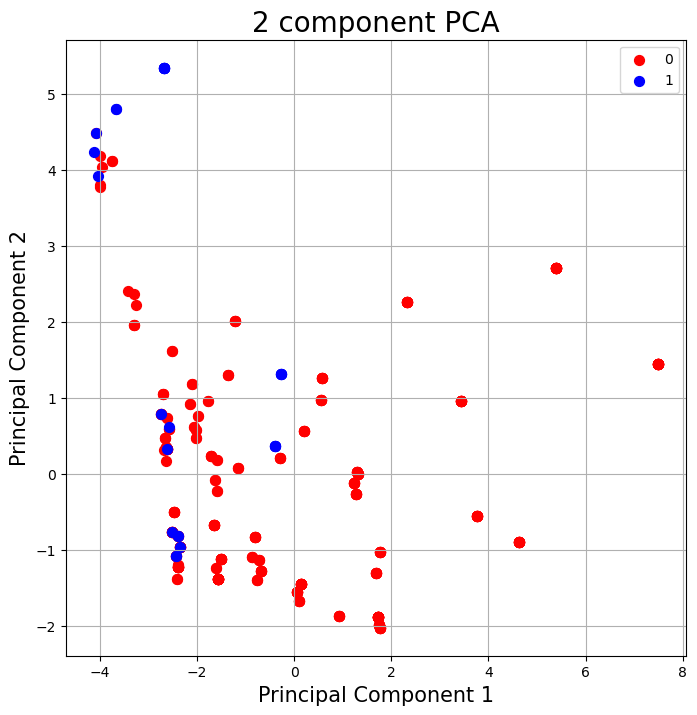

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for label, color in zip(targets,colors):
    indicesToKeep = finalDF['label'] == label
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [80]:
df_lda = pd.DataFrame({'pc1' : finalDF['principal component 1'], 'pc2' : finalDF['principal component 2']})
df_lda

,pc1,pc2
0,1.301766,0.029515
1,1.301766,0.029515
2,1.301766,0.029515
3,1.301766,0.029515
4,1.301766,0.029515
...,...,...
380,-1.356311,1.299657
381,-1.356311,1.299657
382,-1.356311,1.299657
383,-2.395440,-1.220049
